In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df1 = pd.read_csv('diabetes.csv')
df1.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [49]:
df1.shape

(768, 10)

In [50]:
df1.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [51]:
df1.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diabetes', ylabel='count'>

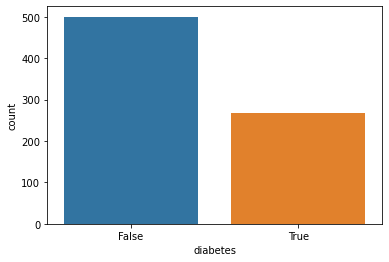

In [52]:
sns.countplot(df1['diabetes'])

In [53]:
df1['diabetes'] = df1['diabetes'].replace({True:1, False:0})
df1.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [54]:
len(df1[df1['diabetes']==1]), len(df1[df1['diabetes']==0])

(268, 500)

In [55]:
df1.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [56]:
df1.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [57]:
feat_cols = ['num_preg', 'glucose_conc', 'insulin', 'bmi', 'diab_pred', 'age']

In [58]:
df1.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [59]:
#normal glucose concentration in blood ranges between (70 to 100)mg/dL and when fasting it ranges from (100 to 125)mg/dL
#normal diastolic bp ranges between 60 and 80

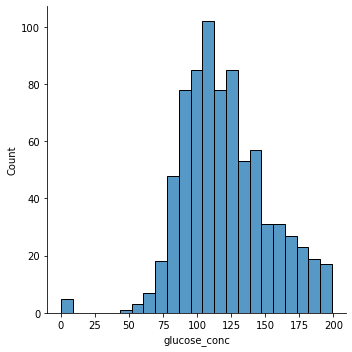

In [60]:
sns.displot(df1['glucose_conc'])

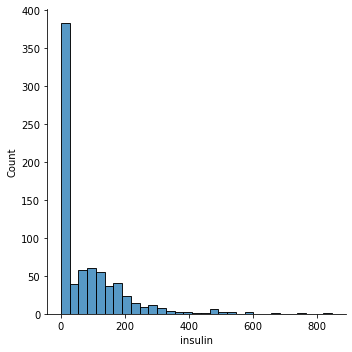

In [61]:
sns.displot(df1['insulin'])

In [62]:
#here we can observe that in some features there are 0 values which are not supposed to be. So we will replace them with the mean of the particular feature.

In [63]:
print("There are {} - 0 values in num_preg column".format(len(df1[df1['num_preg']==0])))
print("There are {} - 0 values in glucose_conc column".format(len(df1[df1['glucose_conc']==0])))
print("There are {} - 0 values in diastolic_bp column".format(len(df1[df1['diastolic_bp']==0])))
print("There are {} - 0 values in insulin column".format(len(df1[df1['insulin']==0])))
print("There are {} - 0 values in bmi column".format(len(df1[df1['bmi']==0])))
print("There are {} - 0 values in num_preg column".format(len(df1[df1['num_preg']==0])))
print("There are {} - 0 values in age column".format(len(df1[df1['age']==0])))

There are 111 - 0 values in num_preg column
There are 5 - 0 values in glucose_conc column
There are 35 - 0 values in diastolic_bp column
There are 374 - 0 values in insulin column
There are 11 - 0 values in bmi column
There are 111 - 0 values in num_preg column
There are 0 - 0 values in age column


In [64]:
X = df1[feat_cols].values
y = df1.iloc[:, -1].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
from sklearn.impute import SimpleImputer
fill = SimpleImputer(missing_values=0, strategy='mean')
X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [68]:
lr_model.score(X_test, y_test)

0.734375

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_model.score(X_test, y_test)

0.78125

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.6979166666666666

In [71]:
#we see that random forest classifier performs better and is giving better accuracy
#Now, let us do hyper-parameter tuning

In [80]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [int(x) for x in np.linspace(10,200,10)]
}

In [81]:
from sklearn.model_selection import KFold
cv = KFold(5)

In [82]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomizedSearchCV(rfc_model, params, cv=cv, n_jobs=1, verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=178, max_features=auto, criterion=gini .............
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  n_estimators=178, max_features=auto, criterion=gini, total=   0.3s
[CV] n_estimators=178, max_features=auto, criterion=gini .............
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV]  n_estimators=178, max_features=auto, criterion=gini, total=   0.3s
[CV] n_estimators=178, max_features=auto, criterion=gini .............
[CV]  n_estimators=178, max_features=auto, criterion=gini, total=   0.3s
[CV] n_estimators=178, max_features=auto, criterion=gini .............
[CV]  n_estimators=178, max_features=auto, criterion=gini, total=   0.3s
[CV] n_estimators=178, max_features=auto, criterion=gini .............
[CV]  n_estimators=178, max_features=auto, criterion=gini, total=   0.3s
[CV] n_estimators=200, max_features=sqrt, criterion=gini .

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   verbose=2)

In [83]:
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=31)

In [84]:
model = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=31)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7864583333333334

In [86]:
model.predict([[8, 183, 79.79, 23.3, 0.672, 32]])

array([1], dtype=int64)

In [77]:
import joblib

filename = 'rfr_model.sav'
joblib.dump(model, filename)

['rfr_model.sav']